In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

In [2]:
img_cv = cv2.imread('./data/242.jpeg')

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
type(img_cv)

numpy.ndarray

In [23]:
img_pl = PIL.Image.open('./data/242.jpeg')

In [24]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

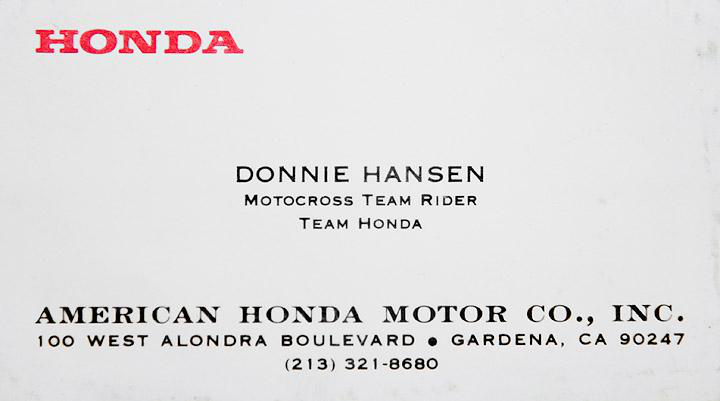

In [25]:
img_pl

In [3]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
text_cv = pytesseract.image_to_string(img_cv)

In [4]:
print(text_cv)

Dr. T. S. Reddy

Senior Consultant
(Traffic & Transportation)

LEA Associates South Asia Pvt. Ltd.

LEAdership in Consulting Engineers & Planners

engineering HL No: 1-4-879/54/1A, Street No. 8,

&p lannin g Near Vijaya Bank, Lower Tank Bund, |
Gandhinagar, Hyderabad-500080 (A.P.) India

solutions Tel: +91-40-66747 122 / 66747135
. Mobile : +91-91778 82230
Email : tsr@lasaindia.com

————— limmappagari@ymait.com

_ ALEA Group company Website - www.lasaindia.com



In [28]:
text_pl = pytesseract.image_to_string(img_pl)

In [29]:
print(text_pl)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



In [30]:
#data.split('\n')
data = pytesseract.image_to_data(img_cv)

In [31]:
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [32]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,92.618942,HONDA
5,2,1,2,0,0,0,237,166,246,63,-1,
6,3,1,2,1,0,0,237,166,246,63,-1,
7,4,1,2,1,1,0,237,166,246,16,-1,
8,5,1,2,1,1,1,237,166,112,16,96.634560,DONNIE
9,5,1,2,1,1,2,364,166,119,16,95.774574,HANSEN


In [35]:
df.dropna(inplace=True) # drop the missing in rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(float)
df[col_int] = df[col_int].astype(int)

In [36]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [39]:
'''
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
            
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
        else:
            continue
            
cv2.imshow("bounding box",image)
cv2.waitKey()
cv2.destroyAllWindows()
'''

In [41]:
import os
from glob import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [42]:
imgPaths = glob('./Selected/*.jpeg')

In [53]:
all_visiting_cards = pd.DataFrame(columns=['id','text'])

for imgPath in tqdm(imgPaths,desc = 'VisitingCards'):
    directory, filename = os.path.split(imgPath)
    
    image = cv2.imread(imgPath)
    data = pytesseract.image_to_data(image)
    dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
    df = pd.DataFrame(dataList[1:], columns=dataList[0])
    df.dropna(inplace=True)
    df['conf'] = df['conf'].astype(float)
    df['conf'] = df['conf'].astype(int)
    
    useFulData = df.query('conf >= 30')
    
    visiting_cards = pd.DataFrame()
    visiting_cards['text'] = useFulData['text']
    visiting_cards['id'] = filename
    
    all_visiting_cards = pd.concat((all_visiting_cards,visiting_cards))

VisitingCards: 100%|█████████████████████████████████████████████████████████████████| 293/293 [02:17<00:00,  2.12it/s]


In [47]:
#all_visiting_cards.to_csv('all_visiting_cards.csv',index=False)

In [54]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,506,300,-1,
1,2,1,1,0,0,0,0,0,505,3,-1,
2,3,1,1,1,0,0,0,0,505,3,-1,
3,4,1,1,1,1,0,0,0,505,3,-1,
4,5,1,1,1,1,1,0,0,505,3,95,
5,2,1,2,0,0,0,23,19,119,118,-1,
6,3,1,2,1,0,0,23,19,119,118,-1,
7,4,1,2,1,1,0,23,19,119,118,-1,
8,5,1,2,1,1,1,23,19,119,118,95,
9,2,1,3,0,0,0,0,0,2,299,-1,


In [55]:
useFulData.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,0,0,505,3,95,
8,5,1,2,1,1,1,23,19,119,118,95,
12,5,1,3,1,1,1,0,0,2,299,95,
16,5,1,4,1,1,1,254,32,48,22,96,Your
17,5,1,4,1,1,2,311,32,95,22,96,Business


In [60]:
visiting_cards.

(33, 2)

In [80]:
text = '''<div class="multiColumn colCount_four" column-count="4"> <a href="https://www.naukri.com/abap-consultant-jobs" target="_blank" title="ABAP Consultant Jobs">ABAP Consultant Jobs</a> <a href="https://www.naukri.com/abap-developer-jobs" target="_blank" title="ABAP Developer Jobs">ABAP Developer Jobs</a> <a href="https://www.naukri.com/abap-programmer-jobs" target="_blank" title="ABAP Programmer Jobs">ABAP Programmer Jobs</a> <a href="https://www.naukri.com/ac-operator-jobs" target="_blank" title="AC Operator Jobs">AC Operator Jobs</a> <a href="https://www.naukri.com/ac-technician-jobs" target="_blank" title="AC Technician Jobs">AC Technician Jobs</a> <a href="https://www.naukri.com/ame-trainee-jobs" target="_blank" title="AME Trainee Jobs">AME Trainee Jobs</a> <a href="https://www.naukri.com/asc-head-jobs" target="_blank" title="ASC Head Jobs">ASC Head Jobs</a> <a href="https://www.naukri.com/ase-jobs" target="_blank" title="ASE'''

In [82]:
import re
re.findall(r'title=\"(.+?) Jobs\">\b',text)

['ABAP Consultant',
 'ABAP Developer',
 'ABAP Programmer',
 'AC Operator',
 'AC Technician',
 'AME Trainee',
 'ASC Head']

In [83]:
with open('all_visiting.txt',mode='r',encoding='utf8',errors='ignore') as f:
    text = f.read()

In [84]:
data = list(map(lambda x:x.split('\t'),text.split('\n')))

In [85]:
df = pd.DataFrame(data[1:],columns=data[0])

In [86]:
df.head(10)

,id,text,tag
0,000.jpeg,,O
1,000.jpeg,.,O
2,000.jpeg,040-4852,B-PHONE
3,000.jpeg,"""8881,""",I-PHONE
4,000.jpeg,90309,B-PHONE
5,000.jpeg,52549,I-PHONE
6,000.jpeg,Fi,O
7,000.jpeg,/laurelsoverseaseducation,O
8,000.jpeg,@:,O
9,000.jpeg,LAURELS,O


In [88]:
import string
whitespace = string.whitespace
punctuation = "!#$%&\'()*+:;<=>?[\\]^`{|}~ÛÏ"
tableWhitespace = str.maketrans('','',whitespace)
tablePunctuation = str.maketrans('','',punctuation)
def cleanText(txt):
    text = str(txt)
    text = text.lower()
    removewhitespace = text.translate(tableWhitespace)
    removepunctuation = removewhitespace.translate(tablePunctuation)
    
    return str(removepunctuation)

In [89]:
df['text'] = df['text'].apply(cleanText)

In [90]:
dataClean = df.query("text != '' ")
dataClean.dropna(inplace=True)

In [91]:
dataClean.head(10)

,id,text,tag
1,000.jpeg,.,O
2,000.jpeg,040-4852,B-PHONE
3,000.jpeg,"""8881,""",I-PHONE
4,000.jpeg,90309,B-PHONE
5,000.jpeg,52549,I-PHONE
6,000.jpeg,fi,O
7,000.jpeg,/laurelsoverseaseducation,O
8,000.jpeg,@,O
9,000.jpeg,laurels,O
10,000.jpeg,overseas,O


In [94]:
group = dataClean.groupby(by='id')
cards = group.groups.keys()

In [95]:
allCardsData = []
for card in cards:
    cardData = []
    grouparray = group.get_group(card)[['text','tag']].values
    content = ''
    annotations = {'entities':[]}
    start = 0
    end = 0
    for text, label in grouparray:
        text = str(text)
        stringLength = len(text) + 1

        start = end
        end = start + stringLength

        if label != 'O':
            annot = (start,end-1,label)
            annotations['entities'].append(annot)

        content = content + text + ' '
        
        
    cardData = (content,annotations)
    allCardsData.append(cardData)

In [96]:
allCardsData

[('. 040-4852 "8881," 90309 52549 fi /laurelsoverseaseducation @ laurels overseas educational consultancy pvt. ltd. sea u.k australia canada ireland www.laurelseducation.com info@laurelseducation.com ',
  {'entities': [(2, 10, 'B-PHONE'),
    (11, 18, 'I-PHONE'),
    (19, 24, 'B-PHONE'),
    (25, 30, 'I-PHONE'),
    (171, 196, 'B-EMAIL')]}),
 ('john smith marketing manager web www.psdgraphics.com phone 123-456-7890 mail email@psdgraphics.com ',
  {'entities': [(0, 4, 'B-NAME'),
    (5, 10, 'I-NAME'),
    (59, 71, 'B-PHONE'),
    (77, 98, 'B-EMAIL')]}),
 ('sau 0 98489 24441 dy "08672," 224441 /enkateswapa wie ',
  {'entities': [(6, 11, 'B-PHONE'),
    (12, 17, 'I-PHONE'),
    (21, 29, 'B-PHONE'),
    (30, 36, 'I-PHONE')]}),
 ('prasad @ "9,96,31,73,53,59,49,04,00,000" i flex design album design visiting cards dtp works telugu english ',
  {'entities': [(0, 6, 'B-NAME')]}),
 ('madison yacht sales paul madison yacht broker - northeast region fax 718-444-1206 ',
  {'entities': [(20, 24, 'B-

In [97]:
import random

In [98]:
random.shuffle(allCardsData)

In [99]:
len(allCardsData)

268

In [100]:
TrainData = allCardsData[:240]
TestData = allCardsData[240:]

In [102]:
import pickle

In [111]:
pickle.dump(TrainData,open('./data/TrainData.pickle',mode='wb'))
pickle.dump(TestData,open('./data/TestData.pickle',mode='wb'))

In [112]:
from spacy.tokens import DocBin
import spacy

In [114]:
nlp = spacy.blank("en")

training_data = pickle.load(open('./data/TrainData.pickle','rb'))
testing_data = pickle.load(open('./data/TestData.pickle','rb'))

In [116]:
db = DocBin()
for text, annotations in training_data:
    doc =nlp(text)
    ents = []
    for start, end, label in annotations['entities']:
        span = doc.char_span(start, end, label=label)
        ents.append(span)
    doc.ents = ents
    db.add(doc)
db.to_disk("./data/train.spacy")

In [117]:
db_test = DocBin()
for text, annotations in testing_data:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations['entities']:
        span  = doc.char_span(start, end, label=label)
        ents.append(span)
    doc.ents = ents
    db_test.add(doc)
db_test.to_disk("./data/test.spacy")

In [118]:
def cleanText(txt):
    whitespace = string.whitespace
    punctuation = "!#$%&\'()*+:;<=>?[\\]^`{|}~"
    tableWhitespace = str.maketrans('','',whitespace)
    tablePunctuation = str.maketrans('','',punctuation)
    text = str(txt)
    text = text.lower()
    removewhitespace = text.translate(tableWhitespace)
    removepunctuation = removewhitespace.translate(tablePunctuation)
    
    return str(removepunctuation)

In [119]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
!python -m spacy init fill-config ./base_config.cfg ./config.cfg

[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy
